# LA Pollutants COVID-19 Analysis

## Importing Packages


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Hypothesis
For each pollutant, I expect the conentrations during lockdown to be lower because there were less pollutants that were being spewed out into the atmosphere during the lockdown; therefore, there would be lower concentrations of pollutants in the atmosphere.

## Data Loading


In [29]:
#df = pd.read_csv('LACounty2019_PM10_clean.csv')
#df.set_index('Date', inplace=True)
#print(df)

file_nicknames = {
    'NO2 2019':'LACounty2019_NO2_clean.csv',
    'NO2 2020': 'LACounty2020_NO2_clean.csv' ,
     'NO2 2021' : 'LACounty2021_NO2_clean.csv', 
    'O3 2019' : 'LACounty2019_O3_clean.csv', 
    'O3 2020': 'LACounty2020_O3_clean.csv', 
     'O3 2021': 'LACounty2021_O3_clean.csv' ,
    'PM10 2019': 'LACounty2019_PM10_clean.csv', 
     'PM10 2020': 'LACounty2020_PM10_clean.csv',
    'PM10 2021': 'LACounty2021_PM10_clean.csv',
    'PM25 2019': 'LACounty2019_PM25_clean.csv', 
    'PM25 2020' : 'LACounty2020_PM25_clean.csv',
    'PM25 2021' : 'LACounty2021_PM25_clean.csv'
} #I made a dictionary so that I don't have to type out the full file names each time; 
#I created nicknames for the files

dataframe = {}

for nickname, file_name in file_nicknames.items():
    df = pd.read_csv(file_name, index_col='Date') #Will read the CSV file into a Dataframe and set index to Dates
    if df.index.duplicated().any(): #Will check for duplicates in the index column
        df = df[~df.index.duplicated(keep='first')] #Will remove the duplicates
    dataframe[nickname] = df
    
print(dataframe['NO2 2019']) #I used the print as a check

            Daily Max 1-hour NO2 Concentration Units  Daily AQI Value  \
Date                                                                    
2019-01-01                                16.9   ppb               15   
2019-01-02                                31.7   ppb               29   
2019-01-03                                34.5   ppb               32   
2019-01-04                                41.8   ppb               39   
2019-01-05                                32.4   ppb               30   
2019-01-06                                22.8   ppb               21   
2019-01-07                                29.5   ppb               27   
2019-01-08                                22.0   ppb               21   
2019-01-09                                36.0   ppb               34   
2019-01-10                                36.5   ppb               34   
2019-01-11                                35.2   ppb               33   
2019-01-12                                31.0   pp

### Data Importation Process
I worked backwards. I knew I had to access the data in some sort of way, so I wanted to nickname all the file names into a shorter description because I don't want to type out long file names later on when I'm calling back to them. I did this through a dictionary where I am able to call back files using the names I created.
I then had to read in the files and convert them to dataframes. Since I'm working with a dictionary, I am using a for loop so that it will iterate each file and read it in and make it into a dataframe. I also wanted to make the date the index, so I included that in the loop. 
To access the data I have loaded in, I just have to use print "dataframe[]" and whatever is in the brackets will be the names I created for each file.

## Data Exploration and Summary Statistics


                     Mean  Std Deviation  1st Quartile  Median  3rd Quartile
Molec and Year                                                              
NO2 2019        25.349315      10.675335        16.800  23.500        32.200
NO2 2020        24.389344      12.424034        13.825  22.300        32.950
NO2 2021        25.013973      10.981908        17.200  22.900        31.400
O3 2019          0.049657       0.016443         0.037   0.048         0.061
O3 2020          0.052597       0.019320         0.037   0.050         0.066
O3 2021          0.046714       0.015138         0.036   0.046         0.058
PM10 2019       22.495868      13.986057        11.000  22.000        32.000
PM10 2020       29.005464      21.911277        16.000  26.000        35.000
PM10 2021       28.043836      14.711073        18.000  28.000        36.000
PM25 2019       11.013425       6.058085         6.800   9.700        14.500
PM25 2020       14.383607      13.286619         7.525  12.100        16.775

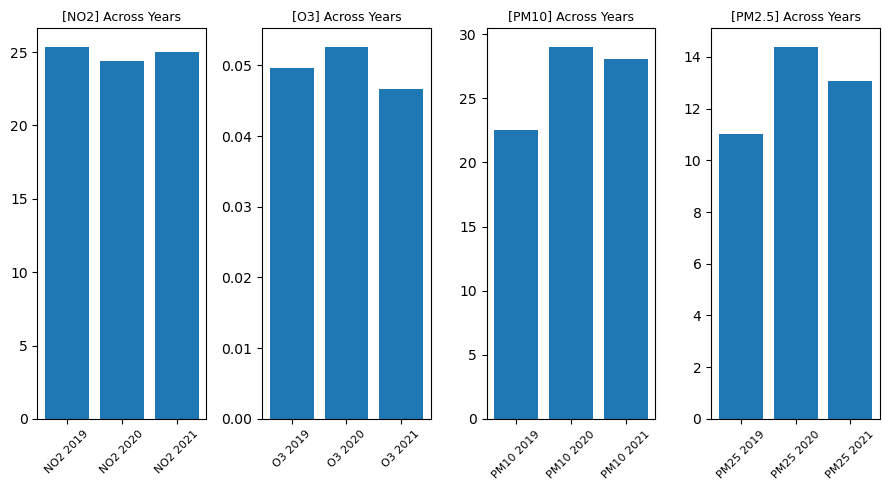

-------------------------------------------------------------------------------------------------------------------


In [26]:

#I created another dictionary that has the nicknames as keys and the actual numerical data as values so
#it's easier to access
column_mappings = {
    'NO2 2019': 'Daily Max 1-hour NO2 Concentration',
    'NO2 2020': 'Daily Max 1-hour NO2 Concentration',
    'NO2 2021' : 'Daily Max 1-hour NO2 Concentration',
    'O3 2019': 'Daily Max 8-hour Ozone Concentration',
    'O3 2020': 'Daily Max 8-hour Ozone Concentration',
    'O3 2021': 'Daily Max 8-hour Ozone Concentration' ,
    'PM10 2019': 'Daily Mean PM10 Concentration', 
    'PM10 2020': 'Daily Mean PM10 Concentration',
    'PM10 2021': 'Daily Mean PM10 Concentration',
    'PM25 2019': 'Daily Mean PM2.5 Concentration', 
    'PM25 2020' : 'Daily Mean PM2.5 Concentration',
   'PM25 2021' : 'Daily Mean PM2.5 Concentration'
}
#Below I'm defining the variables and having somewhere to store them
mean_values = {}
std_values = {}
median_values = {}
first_quartile_values = {}
third_quartile_values = {}
processed_nicknames1 = set() #there were multiple headers of the same data, so it printed out many values; 
#this along with the for loop of "if nickname not in processed_nicknames" will ensure that I will
#only be getting a mean of one of each dataframe.

#creating a for loop so that it can iterate through all the 12 files and do the stats
for nickname, df in dataframe.items():
    if nickname not in processed_nicknames1:
        target_column = column_mappings.get(nickname)
        if target_column in df.columns:
            mean_values[nickname] = df[target_column].mean()
            std_values[nickname] = df[target_column].std()
            median_values[nickname] = df[target_column].median()
            first_quartile_values[nickname] = df[target_column].quantile(0.25)
            third_quartile_values[nickname] = df[target_column].quantile(0.75)
            
summary_df = pd.DataFrame({
    'Molec and Year': list(mean_values.keys()),
    'Mean': list(mean_values.values()),
    'Std Deviation': list(std_values.values()),
    '1st Quartile': list(first_quartile_values.values()),
    'Median': list(median_values.values()),
    '3rd Quartile': list(third_quartile_values.values())
}) 
#I put it into another dataframe so I could make a summary table

summary_df.set_index('Molec and Year', inplace=True) #just setting the index so the table looks nicer
print(summary_df)

print('-' * 115)

#Below is the code for the comparison visual
nicknames = list(column_mappings.keys()) #just making it into a list so that matplotlib can actually plot it

fig, axes = plt.subplots (nrows=1, ncols=4, figsize = (9,5))
selected_keys_hNO2 = nicknames[0:3] #this is so that I can only get each pollutant in a different graph
mean_values_hNO2 = [summary_df.loc[nickname, 'Mean'] for nickname in selected_keys_hNO2]
axes[0].bar(selected_keys_hNO2, mean_values_hNO2)
axes[0].set_title('[NO2] Across Years', fontsize=9)
axes[0].tick_params(axis='x', rotation=45, labelsize=8)

selected_keys_hO3 = nicknames[3:6]
mean_values_hO3 = [summary_df.loc[nickname, 'Mean'] for nickname in selected_keys_hO3]
axes[1].bar(selected_keys_hO3, mean_values_hO3)
axes[1].set_title('[O3] Across Years', fontsize=9)
axes[1].tick_params(axis='x', rotation=45, labelsize=8)

selected_keys_h10 = nicknames[6:9]
mean_values_h10 = [summary_df.loc[nickname, 'Mean'] for nickname in selected_keys_h10]
axes[2].bar(selected_keys_h10, mean_values_h10)
axes[2].set_title('[PM10] Across Years', fontsize=9)
axes[2].tick_params(axis='x', rotation=45, labelsize=8)

selected_keys_h25 = nicknames[9:]
mean_values_h25 = [summary_df.loc[nickname, 'Mean'] for nickname in selected_keys_h25]
axes[3].bar(selected_keys_h25, mean_values_h25)
axes[3].set_title('[PM2.5] Across Years', fontsize=9)
axes[3].tick_params(axis='x', rotation=45, labelsize=8)

plt.tight_layout()
plt.show()

print('-' * 115)

### Conclusion
In terms of the mean for each year, there's not a noticeable difference for the concentrations of NO2 across the three years. For O3, there isn't a noticeable difference either. The differences across years lie in the concentrations of PM10 and PM 25. COVID-19 started in 2020, and there is a peak in the year 2020 when looking across the three years. All of these graphs do not support my hypothesis in which I thought that all concentrations of the molecules would decrease when COVID-19 started. 

## Time Series Analysis

Next, I want to explore how the pollutant concentrations change as a function of time. 

### Goals:
1. Explore any seasonal variations in the concentrations of each pollutant, and look for differences in these trends based on the year.
2. To make a visual(s) that clearly shows the variation in pollutant concentrations as a function of day of the year.

                      Mean  Std Deviation  1st Quartile   Median  3rd Quartile
Molec and Year                                                                
(NO2 2019, 1)    29.232258      10.268735      21.80000  30.3000      34.85000
(NO2 2019, 2)    23.325000       9.357612      16.62500  22.4000      30.05000
(NO2 2019, 3)    23.454839      10.661483      14.45000  21.8000      33.00000
(NO2 2019, 4)    22.743333       8.213474      16.67500  21.9500      30.00000
(NO2 2019, 5)    15.951613       5.355674      13.60000  15.0000      18.65000
(NO2 2019, 6)    17.903333       6.377519      14.42500  16.8000      18.70000
(NO2 2019, 7)    23.864516       8.158740      16.95000  22.6000      30.55000
(NO2 2019, 8)    28.238710       7.199198      24.75000  29.8000      33.80000
(NO2 2019, 9)    26.333333       9.431910      19.00000  24.9500      33.10000
(NO2 2019, 10)   31.845161      10.734301      24.05000  31.7000      40.65000
(NO2 2019, 11)   34.163333      14.018030      23.62

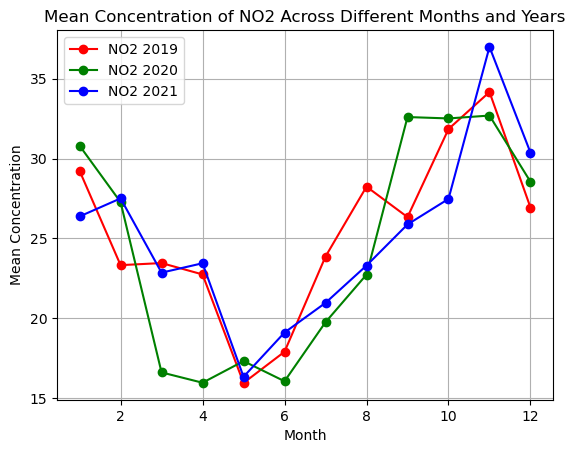

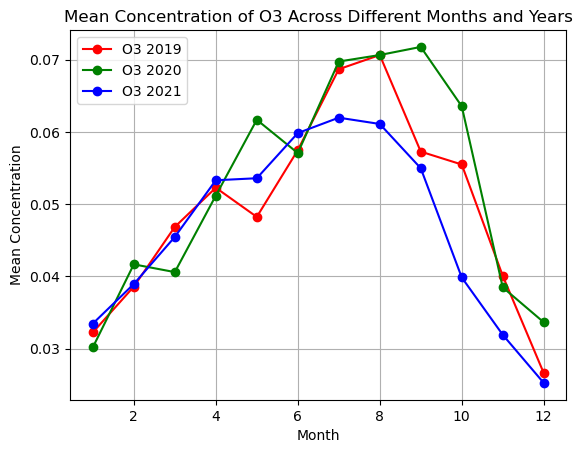

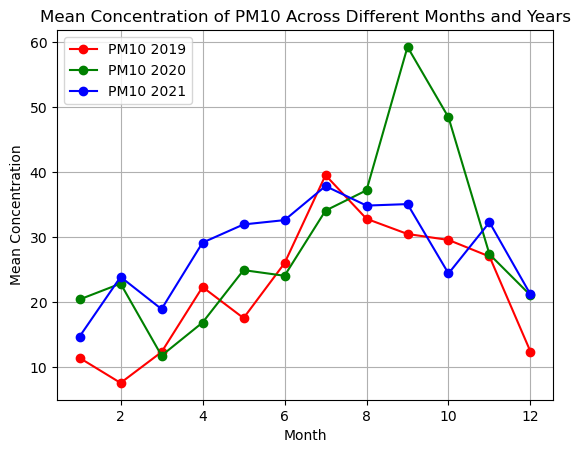

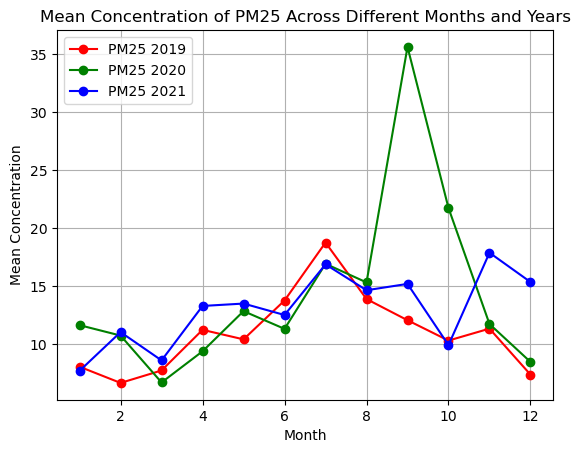

In [27]:


#creating and defining variables, plus a place to store values
mean2_values = {}
std2_values = {}
median2_values = {}
first2_quartile_values = {}
third2_quartile_values = {}
processed_month = set() #to make sure that there are no duplicates

#created a for loop so that I can iterate through each file and do its stats
for nickname, df in dataframe.items():
    if nickname not in processed_nicknames1:
        target_column = column_mappings.get(nickname)
        if target_column in df.columns:
            df.index = pd.to_datetime(df.index)
            df = df.sort_index()
            grouped_by_month = df.groupby(df.index.month) #grouping data by month
            for month, group in grouped_by_month:
                mean2_values[(nickname, month)] = group[target_column].mean()
                std2_values[(nickname, month)] = group[target_column].std()
                median2_values[(nickname, month)] = group[target_column].median()
                first2_quartile_values[(nickname, month)] = group[target_column].quantile(0.25)
                third2_quartile_values[(nickname, month)] = group[target_column].quantile(0.75)
                processed_month.add(month)

#made another DataFrame so I can print it as a table
summary2_df = pd.DataFrame({
    'Molec and Year': list(mean2_values.keys()),
    'Mean': list(mean2_values.values()),
    'Std Deviation': list(std2_values.values()),
    '1st Quartile': list(first2_quartile_values.values()),
    'Median': list(median2_values.values()),
    '3rd Quartile': list(third2_quartile_values.values())
}) 


summary2_df.set_index('Molec and Year', inplace=True)
#pd.set_option('display.max_rows', None)  #Can uncomment if you want to see all the pollutant, year, and month
print(summary2_df)

print('-' *105)

#defining variables and having a place to store
x_values = {}
y_values = {}

for pollutant in ['NO2', 'O3', 'PM10', 'PM25']: #A for loop to iterate over each different pollutant
    x_values[pollutant] = {}
    y_values[pollutant] = {}
    for year in ['2019', '2020', '2021']: #A for loop to iterate over each year for each different pollutant
        x_values[pollutant][year] = []
        y_values[pollutant][year] = []
        for month, mean_value in mean2_values.items(): #A for loop to iterate over each month and get its mean 
                                                        #value after it iterated each pollutant and year
            if month[0].startswith(pollutant) and month[0].endswith(year): #was having problems with matching, 
                                                                            #so this was a check
                x_values[pollutant][year].append(month[1])  
                y_values[pollutant][year].append(mean_value)  

#Below is the code for the plots

for pollutant in ['NO2', 'O3', 'PM10', 'PM25']: #a for loop to create a new graph for each pollutant
    plt.figure()
    # Plot each year's data on the same subplot
    for year, color in zip(['2019', '2020', '2021'], ['red', 'green', 'blue']): #a for loop to make sure that
                                                                                #each year got a diff color per
                                                                                #pollutant graph
        plt.plot(x_values[pollutant][year], y_values[pollutant][year], label=f'{pollutant} {year}', color=color, marker='o')
    plt.xlabel('Month')
    plt.ylabel('Mean Concentration')
    plt.title(f'Mean Concentration of {pollutant} Across Different Months and Years')
    plt.legend()
    plt.grid(True)

plt.show()

### Time-Series Analysis Conclusion

For NO2 the general seasonal trend is that it decreases as it gets warmer and sunnier and increases as it gets colder and darker. This is because of the photolysis of NO2 to NO and O; it needs sunlight for this reaction to happen, so it makes sense that there is less NO2 as the seasons get warmer and sunnier because there is more light to drive this reaction. 
For O3, the general seasonal trend is that it increases as it gets warmer and sunnier and decreases as it gets colder and darker. This plays off of NO2 because the decomposition of NO2, which needs light, is NO and O, and O is needed to make ozone. If there is an increase in O with sunnier days, there is an increase of O3 with sunnier days.
For both particulate matter, they tend to increase when it is dark and cold, which is why there is an upward trend at the colder months.

The concentration of NO2 seems like it was at a lower level in the "lockdown" years compared to the "normal" years. This is especially apparent when looking at the month when the lockdown started, which was mid March. The NO2 2020 concentration was higher than the "normal" years during the first two months, then dropped dramatically during March. Almost every month after March in 2020 had lower NO2 concentrations than that of the "normal" years.
As for concentration of O3, it seemed to have stayed the same or even increase during the lockdown year when looking at the general trend; however, when looking at the 3rd month, when the lockdown started, it dropped dramatically. The world had just went into lockdown, and there weren't a lot of safety measures taken. After that, it seemed that the concentration of O3 was all over the place relative to the other years, but it had an overall increase. The increase most likely stemmed from a lot of VOC emmissions, mainly in the form of disinfectants. After March, more and more laws and protocols were taken to keep everyone safe and disinfectants were used everywhere, including homes. 
The same logic for O3 applies to the particulate matters 10 and 2.5.

## PM10 Spatial Analysis


### Goals:
1. To explore whether the time series trends differ for PM10 among different sampling sites. 
2. To create a visual that demonstrates differences/similarities in time series behavior for PM10 among the different sampling sites


                                                 Mean  Std Deviation  \
Molec and Year                                                         
(PM10 2019, Azusa, 1)                       13.800000       7.395945   
(PM10 2019, Azusa, 2)                       14.600000      12.361230   
(PM10 2019, Azusa, 3)                       15.200000       3.962323   
(PM10 2019, Azusa, 4)                       36.800000      27.179036   
(PM10 2019, Azusa, 5)                       23.400000      13.813037   
(PM10 2019, Azusa, 6)                       25.000000       5.958188   
(PM10 2019, Azusa, 7)                       42.400000      15.043271   
(PM10 2019, Azusa, 8)                       38.333333       9.811558   
(PM10 2019, Azusa, 9)                       41.800000       9.121403   
(PM10 2019, Azusa, 10)                      44.000000      10.488088   
(PM10 2019, Azusa, 11)                      29.400000      24.326940   
(PM10 2019, Azusa, 12)                      12.800000       5.44

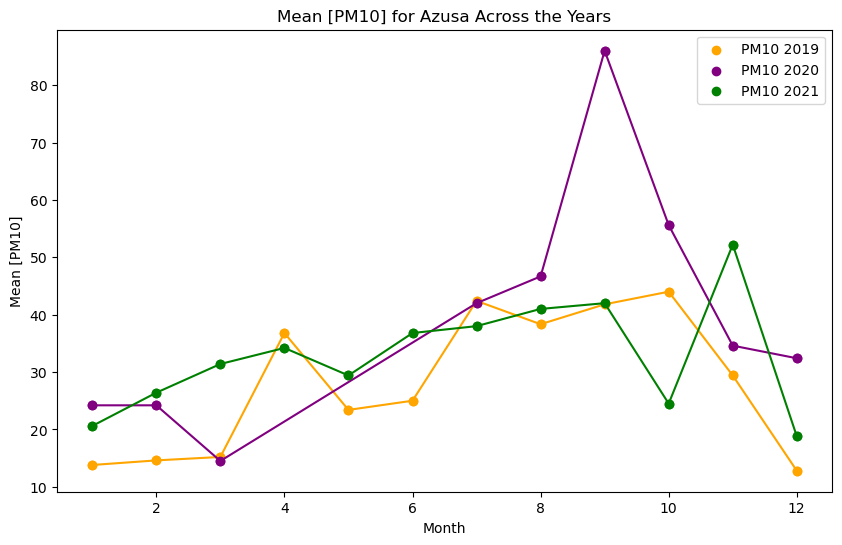

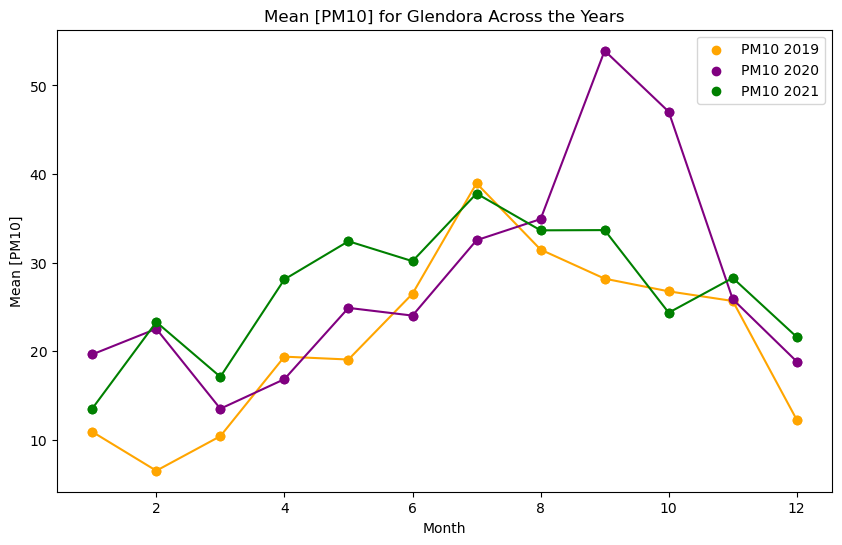

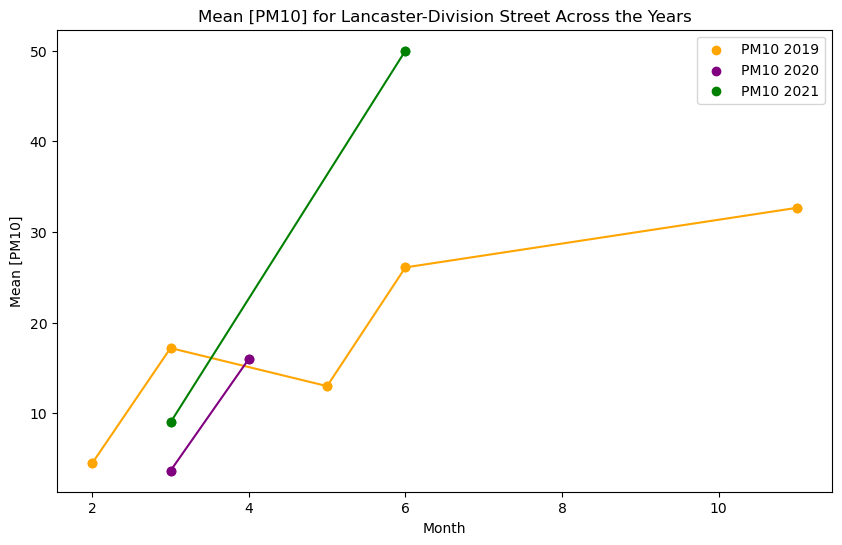

In [28]:

#defining variables and creating a space to store values
mean3_values = {}
std3_values = {}
median3_values = {}
first3_quartile_values = {}
third3_quartile_values = {}

for nickname, df in dataframe.items(): #creating a for loop for just PM10 to get stats for each month
    if nickname.startswith('PM10') and nickname not in processed_nicknames1:
        target_column = column_mappings.get(nickname)
        if target_column in df.columns:
            grouped_by_site = df.groupby(['Site Name', df.index.month])
            for (site, month), group in grouped_by_site:
                # Calculate statistics for each site and month
                key = (nickname, site, month)
                mean3_values[key] = group[target_column].mean()
                std3_values[key] = group[target_column].std()
                median3_values[key] = group[target_column].median()
                first3_quartile_values[key] = group[target_column].quantile(0.25)
                third3_quartile_values[key] = group[target_column].quantile(0.75)

# Putting it into a new DataFrame so it's easier to print a nice table
summary3_df = pd.DataFrame({
    'Molec and Year': list(mean3_values.keys()),
    'Mean': list(mean3_values.values()),
    'Std Deviation': list(std3_values.values()),
    '1st Quartile': list(first3_quartile_values.values()),
    'Median': list(median3_values.values()),
    '3rd Quartile': list(third3_quartile_values.values())
}) 

summary3_df.set_index('Molec and Year', inplace=True)
#pd.set_option('display.max_rows', None)  #Can uncomment if you want to see all the (pollutant, year, site, month) stats
print(summary3_df)

print('-' * 115)

#below is the code for the plots
colors = ['orange', 'purple', 'green']

# a for loop that makes a plot for each different site and to make sure that there are no duplicates
for site in dataframe['PM10 2019']['Site Name'].unique():
    # Create a new figure for each site
    plt.figure(figsize=(10, 6))
    site_data = summary3_df[summary3_df.index.map(lambda x: x[1]) == site] #filtering data for the site
    
    # a for loop that iterates each year
    for i, year in enumerate(['2019', '2020', '2021']):
        year_data = site_data[site_data.index.map(lambda x: x[0].endswith(year))] #filtering data for each year
        
        # Getting the months and mean concentrations
        months = [x[2] for x in year_data.index]
        mean_concentrations = year_data['Mean']
        
        # Creating scatter plot and colors per year
        plt.scatter(months, mean_concentrations, label=f'PM10 {year}', color=colors[i])
        
        # making lines to connect dots
        plt.plot(months, mean_concentrations, linestyle='-', marker='o', color=colors[i])
    
   
    plt.xlabel('Month')
    plt.ylabel('Mean [PM10]')
    plt.title(f'Mean [PM10] for {site} Across the Years')
    plt.legend()
    plt.show()

### Spatial Analysis Conclusion

Most sites do have a spike up near the end of the lockdown year. It gradually increases. This is most likely due to the fact that as we understood how to keep outselves safe more, we were using a lot more disinfectants everywhere. This releases particulate matter into the atmosphere and increases the concentration of PM10. I believe that the end of the months of 2020, more people were going into work and shopping but keeping distance and spraying and disinfecting everywhere they went. The most interesting graph was the Lancaster-Division Street, in which the concentration of PM10 stayed relatively the same from lockdown year to the "normal" years. This could have arised from that the population of Lancaster is significantly lower than that of other areas, so the release of disinfectants with the decrease of commuting didn't really make much of a difference in the "normal" years.

## Final Thoughts and Outcomes



At first glance, it seems that COVID-19 didn't impact LA Air Quality because it seems like most of the concentrations of pollutants stayed relatively the same. Looking at the different months and how the pollutants changed, it is clear that there was an impact from the shutdowns. A lot of the pollutants decreases when the shutdown first happened and there wasn't a lot of activity happening in terms of previous daily life and the prevention and safety measures taken. This does support my original hypothesis when looking at it from the time basis of only the beginnings of lockdown; however, this doesn't support my hypothesis when looking at the later months of the lockdown.

Additional data can include the certain types of sources that go into these pollutants. I'm making a lot of assumptions based off of my experience with the lockdown; the assumption was the contribution of the safety measures that took place that increased the concentrations of certain pollutants. There was no data on this, but it would be helpful to have additional data so that I can be sure whether it was the safety measures that were spiking up the concentrations of the pollutants.
